In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
#PROBLEM: If you had studied longer, would your overall scores get any better
#One way of answering this question is by having data on how long you studied for and what scores you got. 
#We can then try to see if there is a pattern in that data, and if in that pattern, when you add to the hours, 
#it also ends up adding to the scores percentage.

#For instance, say you have an hour-score dataset, which contains entries such as 1.5h and 87.5% score. 
#It could also contain 1.61h, 2.32h and 78%, 97% scores. The kind of data type that can have any intermediate
#value (or any level of 'granularity') is known as continuous data.

#Based on the modality (form) of your data - to figure out what score you'd get based on your study time - 
# you'll perform regression or classification.


In [47]:
### IMPORTANT ###
# Regression is performed on continuous data, while classification is performed on discrete data.
# Regression can be anything from predicting someone's age, the house of a price, or value of any variable.
# Classification includes predicting what class something belongs to (such as whether a tumor is benign or
# malignant).

In [48]:
# For both regression and classification - we'll use data to predict labels
# (umbrella-term for the target variables). Labels can be anything from "B" (class)
# for classification tasks to 123 (number) for regression tasks. 
# Because we're also supplying the labels - these are supervised learning algorithms.

In [49]:
# Load the data
df = pd.read_csv('student_scores.csv') # You'll have to enter the name of your file

In [50]:
# Let's do Exploratory Analysis (quick look for the first 5 elements in the data: the head)
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [51]:
# Let's check the shape of the data set
df.shape

(25, 2)

In [52]:
# We are looking for the relationship between grades and scores. Scatterplots are a great way to explore
# relationships. Observe that as the hours go up, so do the grades: this is a fairly positive correlation!
# The shapes created by the points in the plots point towards a line, so this looks like a "positive linear
# correlation"

<AxesSubplot: title={'center': 'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

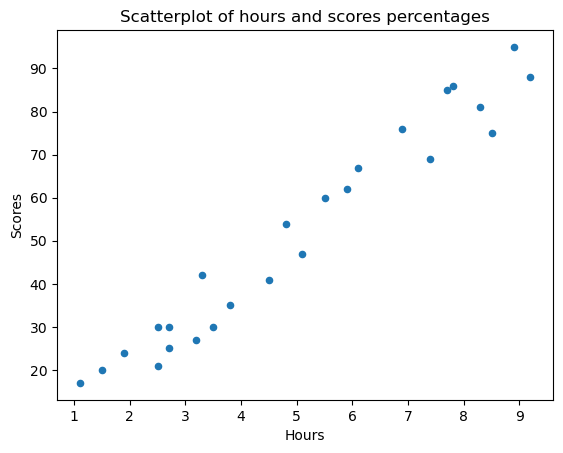

In [53]:
#plt.scatter(x=df['Hours'], y=df['Scores'])
#plt.title('Scatterplot of hours and scores percentages')

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')
# Modufy values for labels for axis and title, as needed

In [54]:
# Let's display in a Data Frame the correlations, using the method "corr()"
# Correlation between hours and scores is 0.97 (anything above 0.8 is considered to be "high").
# When we have a linear relationship between two variables we obtain a line; in the case of three or more
# variables, then we are looking at an intersection of planes.
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [55]:
#Using pandas' describe, we get for free some statitical summaries.
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [56]:
# Because of linearity, we will use y = ax + b. 
# y representes the score percentage
# x represents the hours studied
# b is where the line starts at the Y-axis (called Y-axis intercept)
# a defines whether the line is going to move up/down in the graph (after all, it is the slope).

In [57]:
#### IMPORTANT ###
# By adjusting the slope and intercept of the line, we can move it in any direction.
# Thus - by figuring out the slope and intercept values, we can adjust a line to fit our data!

# That's the heart of linear regression and an algorithm really only figures out the values of the slope
# and intercept. It uses the values of x and y that we already have and varies the values of a and b. 
# By doing that, it fits multiple lines to the data points and returns the line that is closer to all the
# data points, or the best fitting line. By modelling that linear relationship, our regression algorithm
# is also called a model. In this process, when we try to determine, or predict the percentage based on
# the hours, it means that our y variable depends on the values of our x variable.

In [58]:
### DATA PRE-PROCESSING ###
# Let's divide the data frame in 2 arrays: one for the independent variable (y) and one for the dependent one (x)
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [59]:
print('X shape:', X.shape)
print('X:', X)
print('X shape:', y.shape)
print('Y:', y)

X shape: (25, 1)
X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
X shape: (25, 1)
Y: [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [60]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [61]:
# The Liner Rgression model expects a 2D input.
# We will "split" our data for training and validation/test purposes
# Training 20% of the total of data
# Testing 80% of the total of data

In [62]:
# As sampling is random, we will use the parameter random_state to use always the same seed: 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# As test_size is 20%, the system understand that 80% of data should be used for training

In [63]:
print(X_train)
print(y_train)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [64]:
# Now, let's train the model. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Now we need to "fit" the line to our data: we use .fit with our X_tran and y_train data. 
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
# If no errosr are produced, then the "regressor" found the best fitting line!
# Let's inspect the intercept and the slope, one at a time.

In [66]:
print(regressor.intercept_)

[2.82689235]


In [67]:
print(regressor.coef_)

[[9.68207815]]


In [68]:
# if we were to use our formula, y = ax + b, we would get:
my_hours = 5
score = 9.68207815 * my_hours + 2.82689235
print(score)
# This should evaluate to 51.2 and change.
# Observe that the slope value shows what happens to the dependent variable whenever there 
# is an increase (or decrease) of one unit of the independent variable.

51.237283100000006


In [32]:
# Better to avoid manual calculations, let's create a function for that 
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [69]:
# Below, 9.5 is the MAX for Scores, as an example
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[94.80663482]]


In [70]:
# Much better, though, if we would use our model to do the prediction:
score = regressor.predict([[9.5]]) # We are passing 9.5 in double brackets to have a 2-dimensional array
print(score)

[[94.80663482]]


In [71]:
# Now in our array we have a score percentage estimate for each  and every hours we can think of.
# Can we trust these estimates? Well, we split the data in 80% for training and 20% for testing.
# To make predictions on the test data, we pass the X_test values to predict(). Let's assign the results
# to the variable y-pred:

In [72]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[83.18814104]
 [27.03208774]
 [27.03208774]
 [69.63323162]
 [59.95115347]]


In [73]:
# y_pred now contains all the predicted values for the input values in the X_test.
# We can now compare the actual output values for X_test with the predicted values, 
# by arranging them side by side in a dataframe structure:

In [74]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [75]:
# Though our model seems not to be very precise, the predicted percentages are close to the actual ones. 
# Let's quantify the difference between the actual and predicted values to gain an objective view of how
# it's actually performing.

In [76]:
### EVALUATING the Model ###
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"rmse = {rmse:.2f}")

mae = 3.92
mse = 18.94
rmse = 4.35


In [77]:
# All of our errors are low - and we're missing the actual value by 4.35 at most (lower or higher),
# which is a pretty small range considering the "volume" of data we have.